In [1]:
%matplotlib widget
%load_ext autoreload
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.figure, matplotlib.axes
import os
import sys
import numpy as np
thisfiledir=os.path.abspath("")
deepracingmodelsdir = os.path.abspath(os.path.join(thisfiledir, ".."))
deepracingdir = os.path.abspath(os.path.join(thisfiledir, "..", "..", "deepracing_py"))
if (not (deepracingmodelsdir in sys.path)) or (not (deepracingdir in sys.path)):
    sys.path = [deepracingmodelsdir, deepracingdir] + sys.path
import torch
import scipy.interpolate
mtrdir="/p/DeepRacing/MTR"
if (not (mtrdir in sys.path)):
    sys.path.insert(0, mtrdir)
print(sys.path)

['/p/DeepRacing/deepracingws/src/deepracing/DCNN-Pytorch/plotting', '/p/DeepRacing/deepracingws/src/deepracing/DCNN-Pytorch', '/p/DeepRacing/deepracingws/src/deepracing/deepracing_py', '/sw/ubuntu-22.04/python/3.10.13/lib/python310.zip', '/sw/ubuntu-22.04/python/3.10.13/lib/python3.10', '/sw/ubuntu-22.04/python/3.10.13/lib/python3.10/lib-dynload', '', '/p/DeepRacing/python310_13/lib/python3.10/site-packages', '/p/DeepRacing/MTR']


In [2]:
mixnet_results_dir = "/p/DeepRacing/mixnet_results"
mixnet_experiment = "agricultural_flue_8932"
with open(os.path.join(mixnet_results_dir, mixnet_experiment, "data.npz"), "rb") as f:
    mixnet_results_file = np.load(f)
    mixnet_results = {k: v.copy() for (k,v) in mixnet_results_file.items()}
print(list(mixnet_results.keys()))

# bezier_results_dir = "/p/DeepRacing/mixnet_bezier_results"
bezier_results_dir = "/p/DeepRacing/debug"
bezier_experiment = "sporting_flour_4389"
with open(os.path.join(bezier_results_dir, bezier_experiment, "data.npz"), "rb") as f:
    bezier_results_file = np.load(f)
    bezier_results = {k: v.copy() for (k,v) in bezier_results_file.items()}
print(list(bezier_results.keys()))
print("There are %d points" % (bezier_results["history"].shape[0],))
# pts = np.stack([
#     future_left_bd[:,[0,1]].T.flatten(),
#     future_right_bd[:,[0,1]].T.flatten(),
#     future_centerline[:,[0,1]].T.flatten(),
#     future_raceline[:,[0,1]].T.flatten()
#                 ], axis=1)
# gtflat = ground_truth[:,[0,1]].T.flatten()
# Q = pts.T @ pts
# lhs = np.ones([5,5])
# lhs[-1,-1] = 0.0
# lhs[:-1,:-1] = Q
# rhs = np.ones(5)
# rhs[:-1] = pts.T @ gtflat
# best_ratios_, _, _, _ = np.linalg.lstsq(lhs, rhs)
# best_ratios = best_ratios_[:-1]

['lateral_error', 'longitudinal_error', 'ade', 'ground_truth', 'history', 'predictions', 'predictions_global', 'current_position', 'current_orientation', 'future_left_bd', 'future_right_bd']
['tracknames', 'history', 'ground_truth', 'predictions', 'future_left_bd', 'future_right_bd', 'future_centerline', 'future_raceline', 'lateral_error', 'longitudinal_error', 'ade']
There are 125602 points


Singular Vectors of linear combination:
[[-0.52967358  0.71270243 -0.20972461 -0.40928808]
 [-0.4698279  -0.69162122 -0.36558828 -0.40898294]
 [-0.4997679   0.01121827 -0.291371    0.81560354]
 [-0.49893856 -0.11657394  0.85875709  0.00266207]]
Singular Values of linear combination:
[3.23117162e+05 7.55842048e+03 5.70215718e+02 2.64795170e-01]


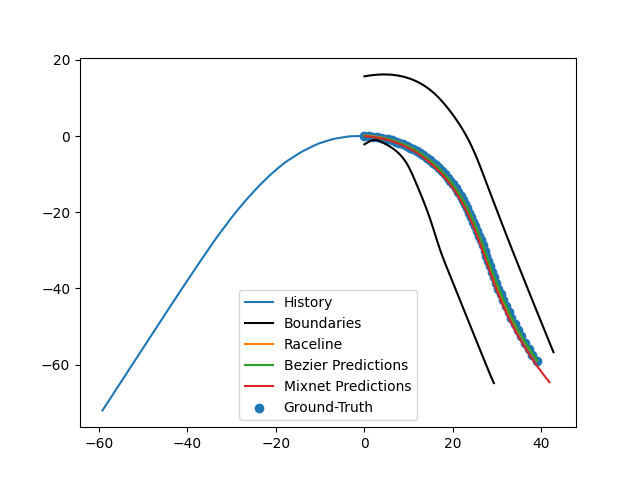

In [4]:
mixnet_ade = mixnet_results["ade"]
bezier_ade = bezier_results["ade"]
idx_sort = np.flipud(np.argsort(bezier_ade))
interesting_indices = [30, 5, 500,-500]

idx = idx_sort[-1]
history = bezier_results["history"][idx]
future_left_bd : np.ndarray = bezier_results["future_left_bd"][idx]
future_right_bd : np.ndarray = bezier_results["future_right_bd"][idx]
future_centerline : np.ndarray = bezier_results["future_centerline"][idx]
future_raceline : np.ndarray = bezier_results["future_raceline"][idx]
ground_truth : np.ndarray = bezier_results["ground_truth"][idx]
bezier_predictions = bezier_results["predictions"][idx]
mixnet_predictions = mixnet_results["predictions"][idx]
pts = np.stack([
    future_left_bd[:,[0,1]].T.flatten(),
    future_right_bd[:,[0,1]].T.flatten(),
    future_centerline[:,[0,1]].T.flatten(),
    future_raceline[:,[0,1]].T.flatten()
                ], axis=1)
Q = pts.T @ pts
U, S, V = np.linalg.svd(Q)
print("Singular Vectors of linear combination:\n" + str(V.T))
print("Singular Values of linear combination:\n" + str(S))

fig : matplotlib.figure.Figure = plt.figure()
plt.plot(history[:,0], history[:,1], label="History")
plt.plot(future_left_bd[:,0], future_left_bd[:,1], color="black")
plt.plot(future_right_bd[:,0], future_right_bd[:,1], color="black", label="Boundaries")
plt.plot(future_raceline[:,0], future_raceline[:,1], label="Raceline")
plt.plot(bezier_predictions[:,0], bezier_predictions[:,1], label="Bezier Predictions")
plt.plot(mixnet_predictions[:,0], mixnet_predictions[:,1], label="Mixnet Predictions")
plt.scatter(ground_truth[:,0], ground_truth[:,1], label="Ground-Truth")
plt.legend()
plt.show()